In [42]:
from qiskit import IBMQ, Aer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, transpile, assemble
from qiskit.visualization import plot_histogram
from qiskit_textbook.tools import simon_oracle

# Función que implementa el Algoritmo de Simon
def simon_algorithm(b):
    n = len(b)
    simon_circuit = QuantumCircuit(2*n,n)
    
    # HADAMARD GATES
    simon_circuit.h(range(n))
    simon_circuit.barrier()
    
    # SIMON ORACLE
    simon_circuit.append(simon_oracle(b).to_gate(label='Q_f'),[0,1,2,3,4,5])
    # simon_circuit.compose(simon_oracle(b),inplace=True)
    simon_circuit.barrier()
    
    # HADAMARD GATES
    simon_circuit.h(range(n))
    simon_circuit.barrier()
    
    # MEASUREMENTS
    simon_circuit.measure(range(n),range(n))
    
    return simon_circuit

simon_algorithm('001').draw()    

┌───┐ ░ ┌──────┐ ░ ┌───┐ ░ ┌─┐      
q_0: ┤ H ├─░─┤0     ├─░─┤ H ├─░─┤M├──────
     ├───┤ ░ │      │ ░ ├───┤ ░ └╥┘┌─┐   
q_1: ┤ H ├─░─┤1     ├─░─┤ H ├─░──╫─┤M├───
     ├───┤ ░ │      │ ░ ├───┤ ░  ║ └╥┘┌─┐
q_2: ┤ H ├─░─┤2     ├─░─┤ H ├─░──╫──╫─┤M├
     └───┘ ░ │  Q_f │ ░ └───┘ ░  ║  ║ └╥┘
q_3: ──────░─┤3     ├─░───────░──╫──╫──╫─
           ░ │      │ ░       ░  ║  ║  ║ 
q_4: ──────░─┤4     ├─░───────░──╫──╫──╫─
           ░ │      │ ░       ░  ║  ║  ║ 
q_5: ──────░─┤5     ├─░───────░──╫──╫──╫─
           ░ └──────┘ ░       ░  ║  ║  ║ 
c: 3/════════════════════════════╩══╩══╩═
                                 0  1  2

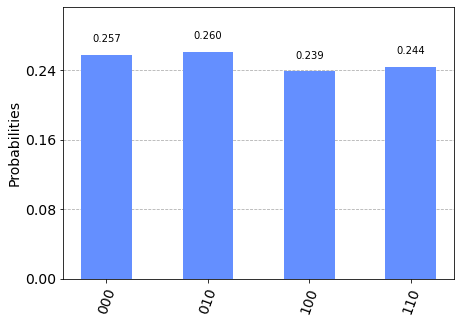

In [43]:
# INPUT
b = '001'

# Simulación del Algoritmo de Simon con la cadena de bits b
aer_sim = Aer.get_backend('aer_simulator')
shots = 2048
algorithm = simon_algorithm(b)
qobj = assemble(transpile(algorithm,aer_sim), shots=shots)
results = aer_sim.run(qobj).result()
counts = results.get_counts()
plot_histogram(counts)

In [44]:

"""
Regla Metamórfica del algoritmo de Simon:

- Al efectuar la suma bit a bit con los posibles resultados del programa 
   que resuelve el algoritmo de Simon, obtenemos de nuevo el conjunto inicial.

"""

def simon_rule(b):
    n = len(b)
        
    simon_circuit = QuantumCircuit(4*n,n)

    # HADAMARD GATES
    simon_circuit.h(range(n))   
    simon_circuit.h(range(2*n,3*n))
    simon_circuit.barrier()
    
    # SIMON ORACLE
    simon_circuit.append(simon_oracle(b).to_gate(label='Q_f'),list(range(2*n)))
    simon_circuit.append(simon_oracle(b).to_gate(label='Q_f'),list(range(2*n,4*n)))
    simon_circuit.barrier()
    
    # HADAMARD GATES
    simon_circuit.h(range(n))   
    simon_circuit.h(range(2*n,3*n))
    simon_circuit.barrier()
    
    # BIT-WISE SUM
    for i in range(n):
        simon_circuit.cx(i,2*n+i)
    simon_circuit.barrier()
    
    # MEASUREMENTS
    simon_circuit.measure(range(2*n,3*n),range(n))

    return simon_circuit

simon_rule1('001').draw()   

┌───┐ ░ ┌──────┐ ░ ┌───┐ ░                 ░          
 q_0: ┤ H ├─░─┤0     ├─░─┤ H ├─░───■─────────────░──────────
      ├───┤ ░ │      │ ░ ├───┤ ░   │             ░          
 q_1: ┤ H ├─░─┤1     ├─░─┤ H ├─░───┼────■────────░──────────
      ├───┤ ░ │      │ ░ ├───┤ ░   │    │        ░          
 q_2: ┤ H ├─░─┤2     ├─░─┤ H ├─░───┼────┼────■───░──────────
      └───┘ ░ │  Q_f │ ░ └───┘ ░   │    │    │   ░          
 q_3: ──────░─┤3     ├─░───────░───┼────┼────┼───░──────────
            ░ │      │ ░       ░   │    │    │   ░          
 q_4: ──────░─┤4     ├─░───────░───┼────┼────┼───░──────────
            ░ │      │ ░       ░   │    │    │   ░          
 q_5: ──────░─┤5     ├─░───────░───┼────┼────┼───░──────────
      ┌───┐ ░ ├──────┤ ░ ┌───┐ ░ ┌─┴─┐  │    │   ░ ┌─┐      
 q_6: ┤ H ├─░─┤0     ├─░─┤ H ├─░─┤ X ├──┼────┼───░─┤M├──────
      ├───┤ ░ │      │ ░ ├───┤ ░ └───┘┌─┴─┐  │   ░ └╥┘┌─┐   
 q_7: ┤ H ├─░─┤1     ├─░─┤ H ├─░──────┤ X ├──┼───░──╫─┤M├───
      ├───┤ ░ │      │ ░ ├───┤ ░      └───┘┌─┴─┐ ░  ║ └╥┘┌─┐
 q_8: ┤ H ├─░─┤2     ├─░─┤ H ├─░───────────┤ X ├─░──╫──╫─┤M├
      └───┘ ░ │  Q_f │ ░ └───┘ ░           └───┘ ░  ║  ║ └╥┘
 q_9: ──────░─┤3     ├─░───────░─────────────────░──╫──╫──╫─
            ░ │      │ ░       ░                 ░  ║  ║  ║ 
q_10: ──────░─┤4     ├─░───────░─────────────────░──╫──╫──╫─
            ░ │      │ ░       ░                 ░  ║  ║  ║ 
q_11: ──────░─┤5     ├─░───────░─────────────────░──╫──╫──╫─
            ░ └──────┘ ░       ░                 ░  ║  ║  ║ 
 c: 3/══════════════════════════════════════════════╩══╩══╩═
                                                    0  1  2

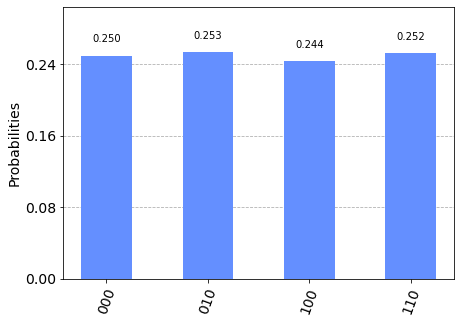

In [45]:
# INPUT
b = '001'

# Simulación de la primera regla metamórfica con la cadena de bits b
aer_sim = Aer.get_backend('aer_simulator')
shots = 2048
qobj = assemble(transpile(simon_rule(b),aer_sim), shots=shots)
results = aer_sim.run(qobj).result()
counts = results.get_counts()
plot_histogram(counts)

In [46]:

"""
Regla metamórfica del algoritmo de Simon:
- Aplicar la implementación del algoritmo a una cadena e invertir las cadenas
   de bits resultantes, equivale a aplicar el programa a la cadena inicial invertida.

"""


def reverse_str(word: str) -> str:
    return word[::-1]

def reverse_lst(words: [str]) -> [str]:
    return list(map(reverse_str,words))

# INPUT
a = '001'
b = reverse_str(a)

aer_sim = Aer.get_backend('aer_simulator')
# INITIAL LOCAL SIMULATOR
qobj = assemble(transpile(simon_algorithm(a),aer_sim), shots=1024)
results = aer_sim.run(qobj).result()
counts = results.get_counts()
print(sorted(set(counts.keys())))

# REVERSED LOCAL SIMULATOR
qobj = assemble(transpile(simon_algorithm(b),aer_sim), shots=1024)
results = aer_sim.run(qobj).result()
counts = results.get_counts()
print(sorted(reverse_lst(set(counts.keys()))))

['000', '010', '100', '110']
['000', '010', '100', '110']
